In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
d = pd.read_csv('fluct_6400000.000000_0.000000_1000000_0.000500.txt')
d = d[:int(1*len(d))]

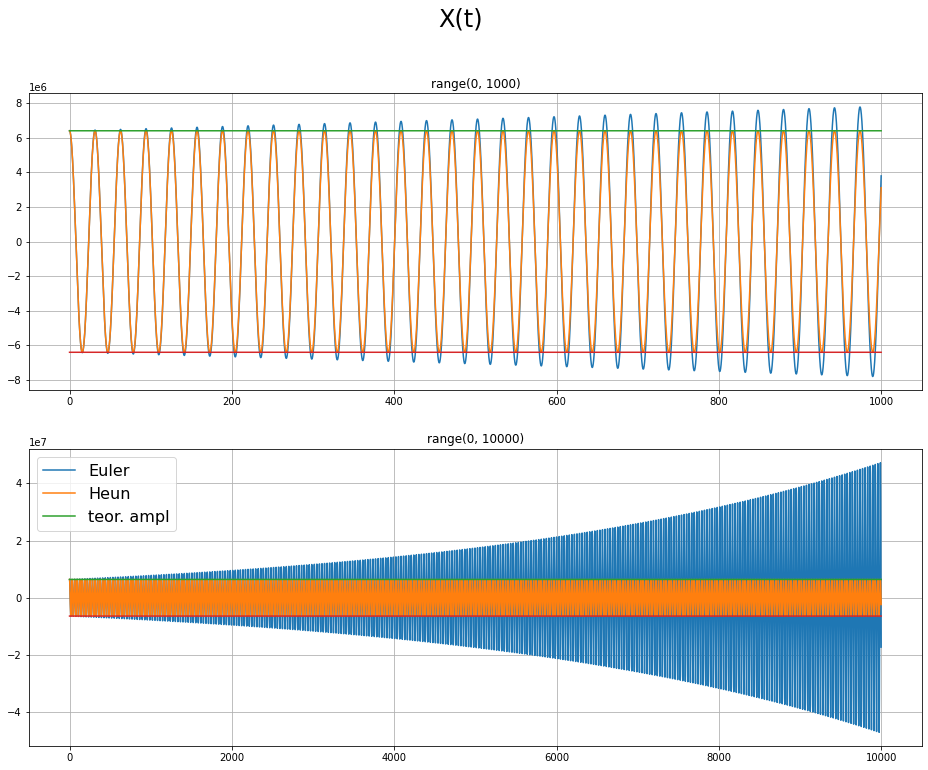

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('X(t)', fontsize=24)
fig.set_size_inches(16, 12)

t = np.linspace(0, len(d)*0.01*0.1, int(len(d)*0.1))
ax1.plot(t, d.e_x[:len(t)], '-', label='Euler')
ax1.plot(t, d.h_x[:len(t)], '-', label='Heun')
ax1.plot(t, t-t+6.4e6, label='teor. ampl')
ax1.plot(t, t-t-6.4e6)

t = np.linspace(0, len(d)*0.01, len(d))
ax2.plot(t, d.e_x, '-', label='Euler')
ax2.plot(t, d.h_x, '-', label='Heun')
ax2.plot(t, t-t+6.4e6, label='teor. ampl')
ax2.plot(t, t-t-6.4e6)
ax2.legend(fontsize=16, loc='best')


ax1.set_title('range(0, 1000)')
ax2.set_title('range(0, 10000)')
ax1.grid(True)
ax2.grid(True)
plt.show()

Видно, что Хойн устойчивее (считалось на шаге 0,001).
Теоретическое предсказание нарисовал прямыми, потому что Хойн и теория становятся неотличимы.  
Проблема метода Эйлера в излишнем пренебрежении - за основу рассчета берется система
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t
\end{cases}$. 
Но это неправильно, ведь при рассчете шага координаты мы считаем, что движение равномерное, а в рассчете скорости - что движение равноускоренное. Правильнее было бы
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t + \frac{a_i}{2} (\Delta t)^2
\end{cases}$  
Хойн учитывает эту проблему усредняя по $i$ и $i+1$ шагу.